In [213]:
import pandas as pd
import numpy as np

In [214]:
from sentence_transformers import SentenceTransformer

In [3]:
train = pd.read_json('train-code25-smol.json')
test = pd.read_json('test-code25-smol.json')

In [215]:
model = SentenceTransformer('huggingface/CodeBERTa-small-v1')

No sentence-transformers model found with name /home/qnbhd/.cache/torch/sentence_transformers/huggingface_CodeBERTa-small-v1. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/qnbhd/.cache/torch/sentence_transformers/huggingface_CodeBERTa-small-v1 were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
X_train_embeddings = model.encode(train['code'].values, show_progress_bar=True)

Batches:   0%|          | 0/337 [00:00<?, ?it/s]

In [8]:
X_test_embeddings = model.encode(test['code'].values, show_progress_bar=True)

Batches:   0%|          | 0/85 [00:00<?, ?it/s]

In [5]:
import joblib

In [10]:
# joblib.dump(X_train_embeddings, 'X_train_embeddings.joblib')

['X_train_embeddings.joblib']

In [11]:
# joblib.dump(X_test_embeddings, 'X_test_embeddings.joblib')

['X_test_embeddings.joblib']

In [6]:
X_train_embeddings = joblib.load('X_train_embeddings.joblib')
X_test_embeddings = joblib.load('X_test_embeddings.joblib')

In [7]:
import umap
import umap.plot

In [86]:
umap_emb = umap.UMAP(n_neighbors=6, min_dist=0.01).fit(X_train_embeddings)

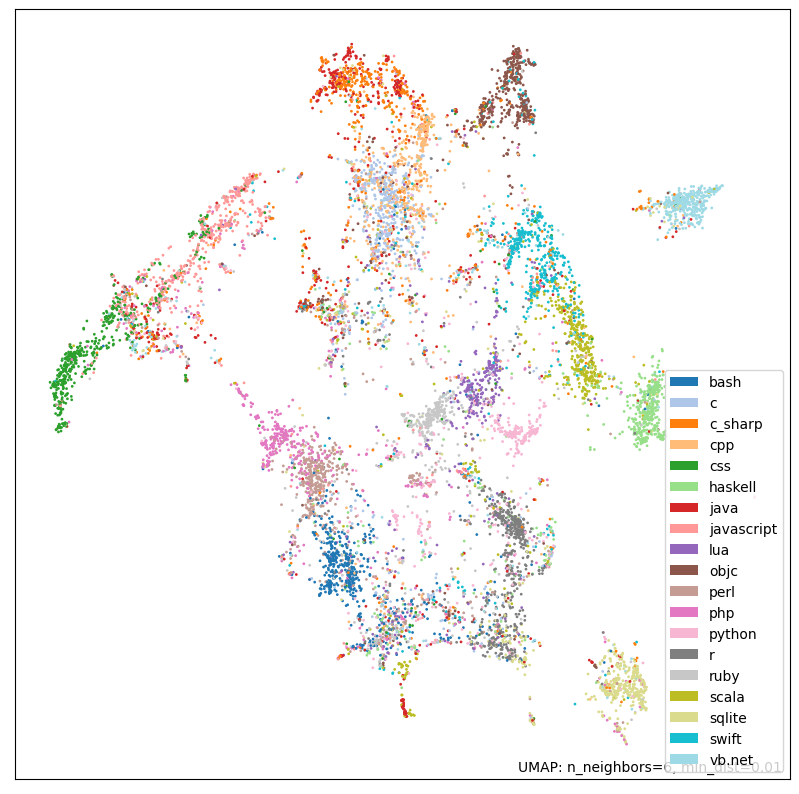

In [87]:
fig = umap.plot.points(umap_emb, labels=train['language'], color_key_cmap='tab20', width=1000, height=1000)

In [79]:
fig.figure.savefig('umap-emb.png')

In [211]:
filtered_train = pd.read_csv('train.csv')

In [216]:
X_filtered_train_embeddings = model.encode(filtered_train['code'].values, show_progress_bar=True)

Batches:   0%|          | 0/353 [00:00<?, ?it/s]

In [220]:
mapper = umap.UMAP().fit(X_filtered_train_embeddings)

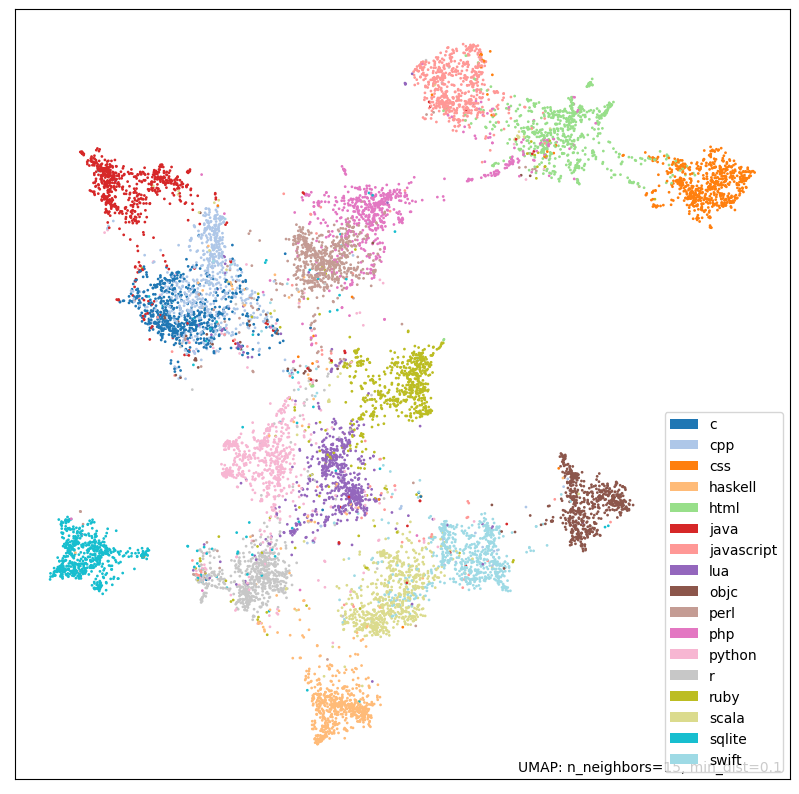

In [221]:
fig = umap.plot.points(mapper, labels=filtered_train['language'], color_key_cmap='tab20', width=1000, height=1000)

In [223]:
fig.figure.savefig('filtered-umap.png')